### Load in dataset properties

In [17]:
import openml
import numpy as np
import pandas as pd

###################### obtain the benchmark suite #######################
set_100 = openml.study.get_suite('OpenML100')

dimen_100 = []

for task_id in set_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # get the data
        dimen_100.append(np.shape(features_100))
    except:
        print('Error in OpenML 100 dataset ' + str(task_id))
        
########################## read in accuracies ###########################

acc_100 = open('SPORF_accuracies_opti-hyper_100-trial.txt','r')

SPORF_taskID_100 = []
SPORF_name_100 = []
SPORF_accuracy_100 = []
SPORF_time_100 = []

for line in acc_SPORF_100:
    fields = line.split(',')
    SPORF_taskID_100.append(fields[0])
    SPORF_name_100.append(fields[1])
    SPORF_accuracy_100.append(float(fields[2]))
    SPORF_time_100.append(fields[3])

# print(np.shape(SPORF_accuracy_100)) <- WORKS!

Error in OpenML 100 dataset 34536


### Find accuracy differences

In [18]:
acc_diffs_100 = []

for i in range(len(SPORF_accuracy_100)):
    acc_diffs_100.append(SPORF_accuracy_100[i]-skRF_accuracy_100[i])

### Plot differences (scatterplot)

RF was better for 11 datasets in CC18
RF was better for 17 datasets in 100


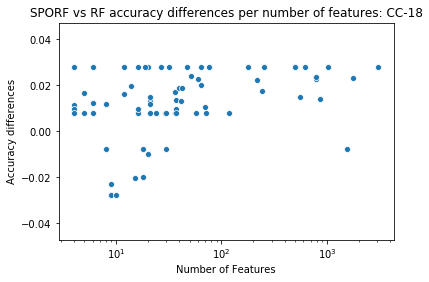

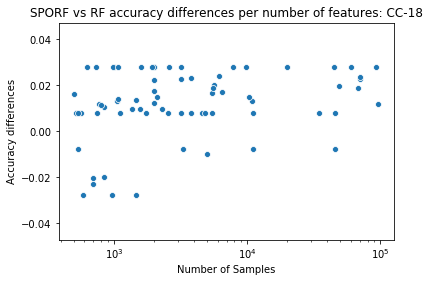

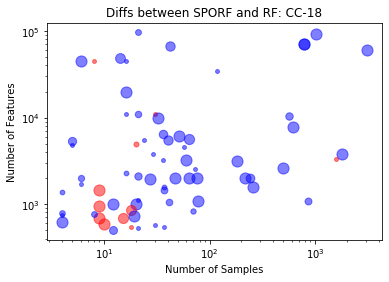

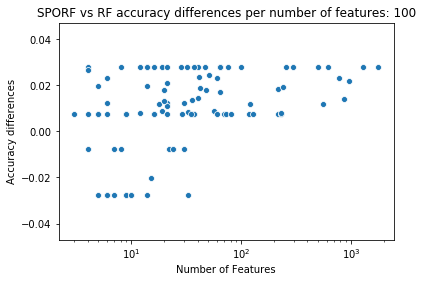

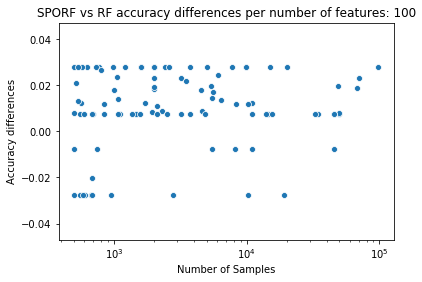

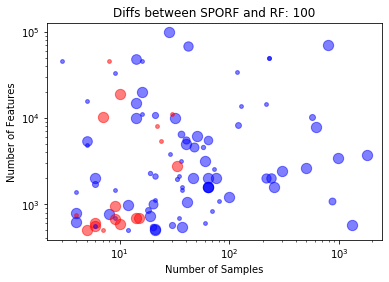

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# OpenML 100
n_features_100 = []
n_samples_100 = []

for i in range(len(SPORF_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, acc_diffs_100))
n_samples_100 = np.vstack((n_samples_100, acc_diffs_100))
            
plt.figure()
sns.scatterplot(n_features_100[:][0],n_features_100[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy differences')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF vs RF accuracy differences per number of features: 100')

plt.figure()
sns.scatterplot(n_samples_100[:][0],n_samples_100[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy differences')
plt.xscale('log')
# plt.yscale('log')
plt.title('SPORF vs RF accuracy differences per number of features: 100')

Dacc_diffs_100 = acc_diffs_100

c = np.mean(acc_diffs_100)-0.01
d = np.mean(acc_diffs_100)+0.01

for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        if acc_diffs_100[i] < (c):
            Dacc_diffs_100[i] = c
        if acc_diffs_100[i] > (d):
            Dacc_diffs_100[i] = d
    else:
        if acc_diffs_100[i] > (c*-1):
            Dacc_diffs_100[i] = c*-1
        if acc_diffs_100[i] < (d*-1):
            Dacc_diffs_100[i] = d*-1

red_100 = 0
plt.figure()
for i in range(len(Dacc_diffs_100)):
    if Dacc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (Dacc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (Dacc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('Diffs between SPORF and RF: 100')
        
print('RF was better for ' + str(red_100) + ' datasets in 100')

### Plot Runtimes

Text(0.5, 1.0, 'SPORF Runtimes: 100')

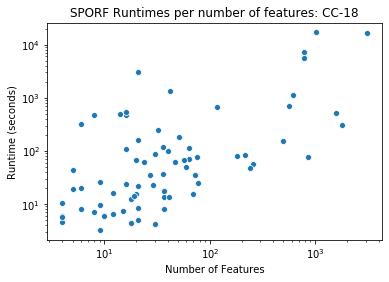

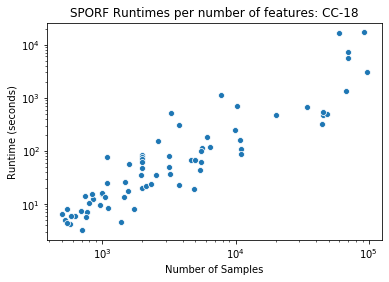

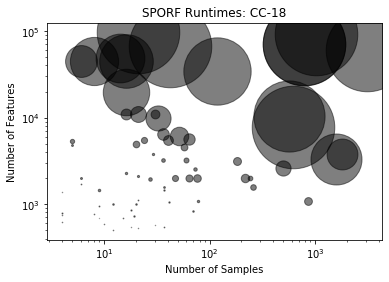

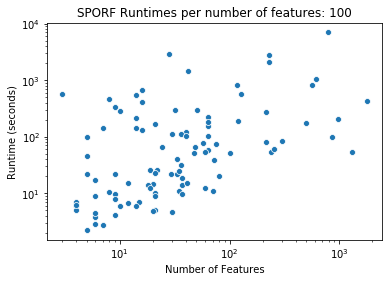

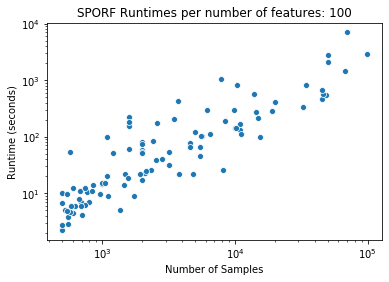

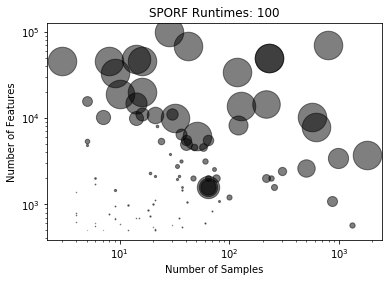

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

## SPORF 100
hours = []
minutes = []
seconds = []
total_time = []
for time in SPORF_time_100:
    timefields = time.split(':')
    hours.append(timefields[0])
    minutes.append(timefields[1])
    seconds.append(float(timefields[2]))
    total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

n_features_100 = []
n_samples_100 = []

for i in range(len(SPORF_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, total_time))
n_samples_100 = np.vstack((n_samples_100, total_time))

plt.figure()
sns.scatterplot(n_features_100[:][0],n_features_100[:][1])
plt.xlabel('Number of Features')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')

plt.figure()
sns.scatterplot(n_samples_100[:][0],n_samples_100[:][1])
plt.xlabel('Number of Samples')
plt.ylabel('Runtime (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes per number of features: 100')

b = np.mean(total_time)+1

for i in range(len(total_time)):
    if total_time[i] > (b):
        total_time[i] = b

plt.figure()
for i in range(len(SPORF_time_100)):
    plt.plot(dimen_100[i][1],dimen_100[i][0],'ko',MarkerSize = (total_time[i]/10),alpha=0.5)
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('SPORF Runtimes: 100')
